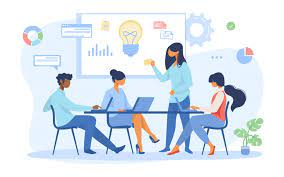

This assessment is intended to conduct exploratory data analysis (EDA) on a marketing campaign dataset from a telecommunication company. A telecommunication company recently launched a marketing campaign to promote the adoption of their new subscription plan among customers. The company seeks assistance in gaining a comprehensive understanding of their customers and identifying the customer segments that display the highest responsiveness to marketing campaigns. The response variable, subscribed, indicates whether the client subscribed to a new plan, which was the objective of the campaign.

The dataset may have issues such missing information and data errors. Identifying and handling such issues is part of the assessment.

The requirements involve applying a minimum of three distinct exploratory data analysis techniques to gain preliminary insights from the data.

#1.Data Collection

In [3]:
#[1.1] import essential libraries
import pandas as pd
import dataprep
from dataprep.eda import plot
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#[1.2]read csv file from google drive
df=pd.read_csv("/content/drive/MyDrive/Statistical thinking/TeleCom_Data-1.csv")

# 2.Understand the data structure

In [5]:
#[2-1] Display the 5 first rows of df
df.head()

age          job  marital            education  default housing loan  \
0   40       admin.  married             basic.6y       no      no   no   
1   56     services  married          high.school       no      no  yes   
2   45     services  married             basic.9y  unknown      no   no   
3   59       admin.  married  professional.course       no      no   no   
4   41  blue-collar  married              unknown  unknown      no   no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  telephone   may         mon  ...         1    999         0  nonexistent   
1  telephone   may         mon  ...         1    999         0  nonexistent   
2  telephone   may         mon  ...         1    999         0  nonexistent   
3  telephone   may         mon  ...         1    999         0  nonexistent   
4  telephone   may         mon  ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          1.1          93.994          -36.4      4.857       5191.0  no  
1          1.1          93.994          -36.4      4.857       5191.0  no  
2          1.1          93.994          -36.4      4.857       5191.0  no  
3          1.1          93.994          -36.4      4.857       5191.0  no  
4          1.1          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [6]:
#[2-2] Display the dimentions (shape) of df
df.shape

(41180, 21)

In [7]:
# [2-3] Display the summary (info) of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41180 entries, 0 to 41179
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41180 non-null  int64  
 1   job             41180 non-null  object 
 2   marital         41180 non-null  object 
 3   education       41180 non-null  object 
 4   default         41180 non-null  object 
 5   housing         41180 non-null  object 
 6   loan            41180 non-null  object 
 7   contact         41180 non-null  object 
 8   month           41180 non-null  object 
 9   day_of_week     41180 non-null  object 
 10  duration        41180 non-null  int64  
 11  campaign        41180 non-null  int64  
 12  pdays           41180 non-null  int64  
 13  previous        41180 non-null  int64  
 14  poutcome        41180 non-null  object 
 15  emp.var.rate    41180 non-null  float64
 16  cons.price.idx  41180 non-null  float64
 17  cons.conf.idx   41180 non-null 

The dataset consists of 41180 records of customer information. It consists of 20 variable predictors, including both categorical and continuous variables.
An objective of this project is to assist the company in gaining an understanding of its customers and identifying the segments of customers with the highest potential for responding to marketing campaigns. The response variable, subscribed, indicates whether the client subscribed to a new plan, which was the campaign's objective.

# 3.Basic Summary Statistics

In [8]:
# [2-4] Display the descriptive statictics of df
df.describe()

age      duration      campaign         pdays      previous  \
count  41180.000000  41180.000000  41180.000000  41180.000000  41180.000000   
mean      40.021710    258.280427      2.567800    962.516707      0.172705   
std       10.419593    259.299856      2.770225    186.809028      0.493719   
min       17.000000      0.000000      1.000000      0.000000      0.000000   
25%       32.000000    102.000000      1.000000    999.000000      0.000000   
50%       38.000000    180.000000      2.000000    999.000000      0.000000   
75%       47.000000    319.000000      3.000000    999.000000      0.000000   
max       98.000000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41180.000000    41180.000000   41180.000000  41180.000000  41180.000000  
mean       0.081901       93.575508     -40.501999      3.621422   5167.053344  
std        1.571037        0.578762       4.627358      1.734385     72.230334  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

# 4.Data Cleaning

In [9]:
#[3.1] Create a copy of df and save it into a variable called df_cleaned
df_cleaned=df.copy()


<Axes: >

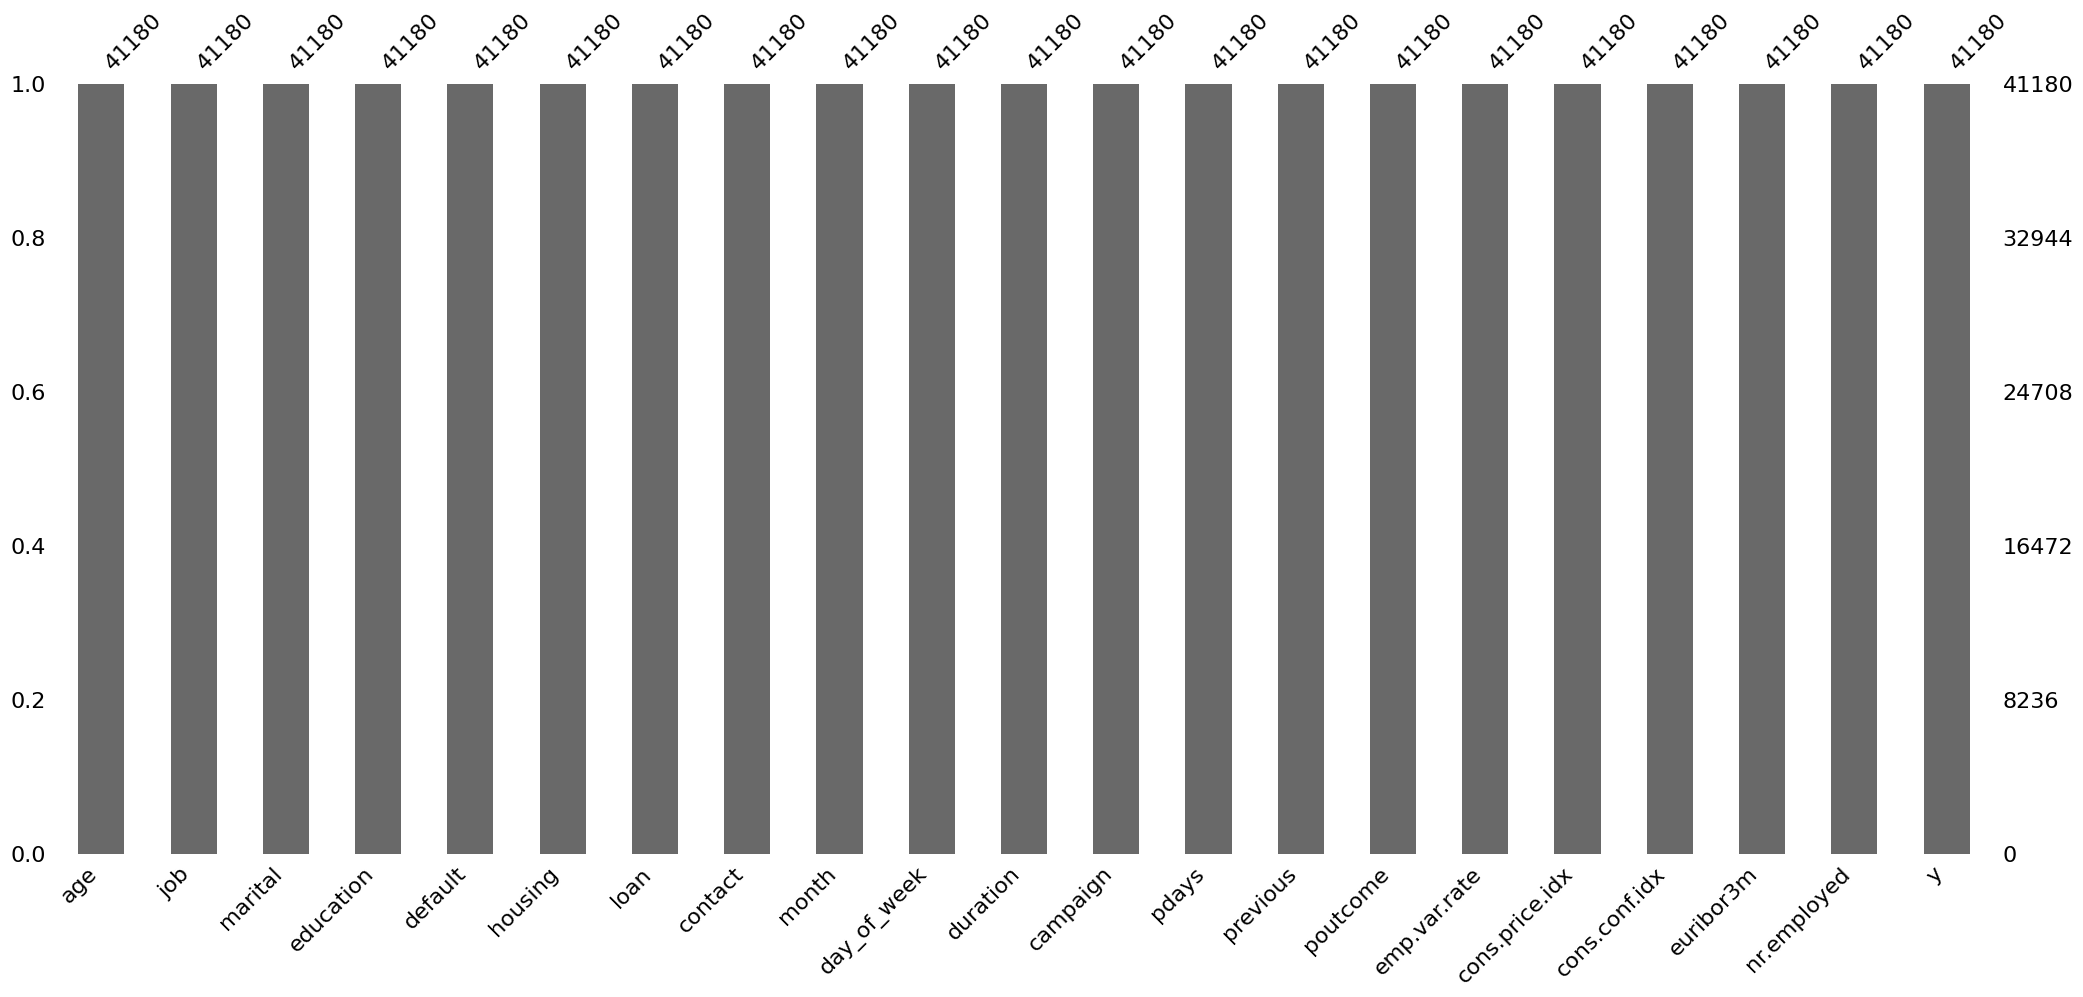

In [10]:
# [3-2] finding missing values
msno.bar(df_cleaned)

In [11]:
#[3-3]Count the number of columns with missing values
num_columns_with_missing = df_cleaned.isna().any().sum()

# Print the result
print("Number of columns with missing values:", num_columns_with_missing)

Number of columns with missing values: 0


In [12]:
#Check for duplicates
has_duplicates = df.duplicated().any()

# Print the result
if has_duplicates:
    print("There are duplicate rows in the DataFrame.")
else:
    print("There are no duplicate rows in the DataFrame.")

There are duplicate rows in the DataFrame.


In [13]:
# Count the number of duplicate rows
duplicate_count = df.duplicated().sum()

print("Number of Duplicate Rows:", duplicate_count)

Number of Duplicate Rows: 12


In [14]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)


# 5.Explore The response variable


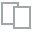
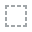
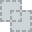
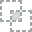
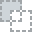
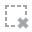
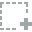
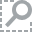
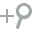
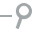
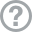
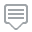
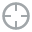
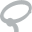
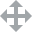
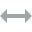
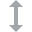
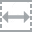
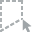
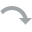
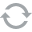
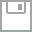
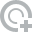
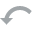
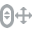
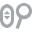
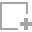
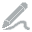
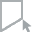
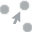
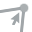
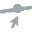

In [15]:
#Explore response variable
import dataprep
from dataprep.eda import plot

plot(df, 'y')


The dataset is quite imbalanced, with most data related to customers who did not subscribe.

# 6.Explore Numerical Predictor Variables

In [16]:
#change the target value from categorical to numerical
df['y'] = df['y'].replace({'yes': 1, 'no': 0})

In [17]:
# finding numerical columns
df_num= df.select_dtypes(include=np.number)
df_num[df_num.columns]

age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0       40       151         1    999         0           1.1          93.994   
1       56       307         1    999         0           1.1          93.994   
2       45       198         1    999         0           1.1          93.994   
3       59       139         1    999         0           1.1          93.994   
4       41       217         1    999         0           1.1          93.994   
...    ...       ...       ...    ...       ...           ...             ...   
41175   29       112         1      9         1          -1.1          94.767   
41176   73       334         1    999         0          -1.1          94.767   
41177   46       383         1    999         0          -1.1          94.767   
41178   56       189         2    999         0          -1.1          94.767   
41179   44       442         1    999         0          -1.1          94.767   

       cons.conf.idx  euribor3m  nr.employed  y  
0              -36.4      4.857       5191.0  0  
1              -36.4      4.857       5191.0  0  
2              -36.4      4.857       5191.0  0  
3              -36.4      4.857       5191.0  0  
4              -36.4      4.857       5191.0  0  
...              ...        ...          ... ..  
41175          -50.8      1.028       4963.6  0  
41176          -50.8      1.028       4963.6  1  
41177          -50.8      1.028       4963.6  0  
41178          -50.8      1.028       4963.6  0  
41179          -50.8      1.028       4963.6  1  

[41168 rows x 11 columns]

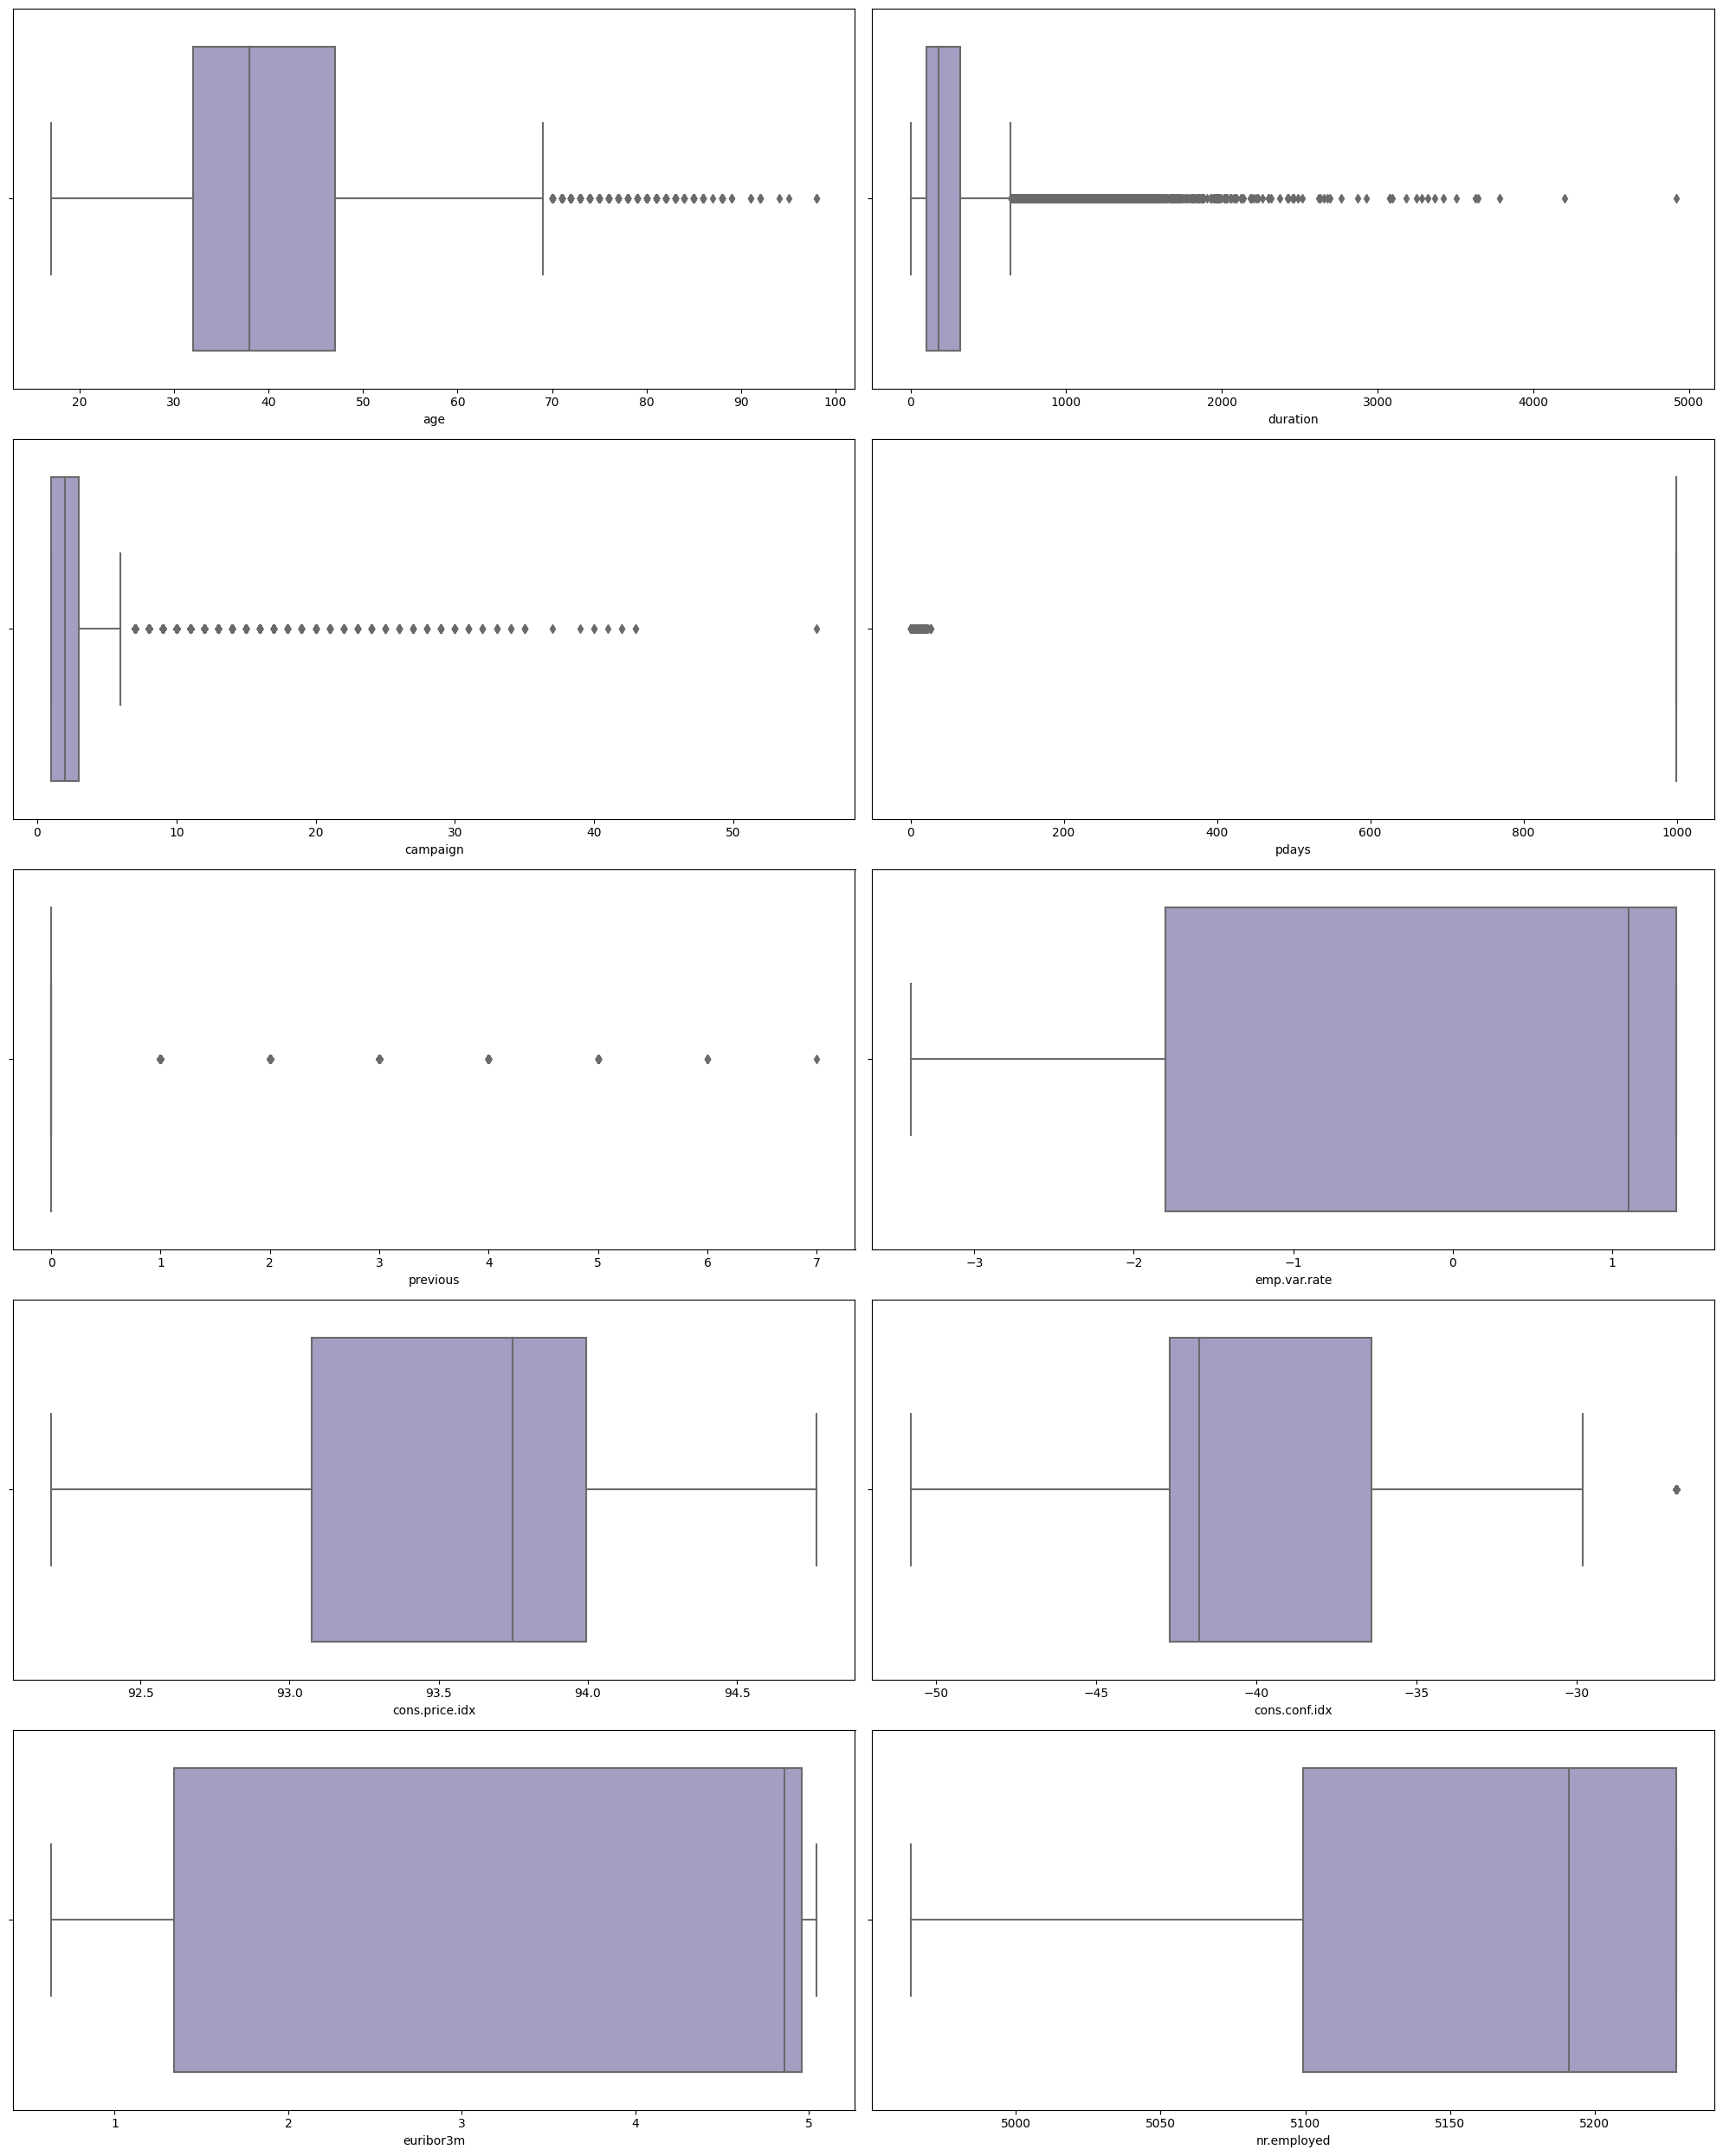

In [18]:
#box plots
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot for identifying outliers
# Select the numeric columns in the cleaned training data
num_cols = df.select_dtypes(include='number').columns.tolist()
num_cols.remove('y')  # Remove the column 'y'

# Create a grid of subplots for each numeric column
num_rows = (len(num_cols) - 1) // 2 + 1  # Adjusted for 5 rows
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(20,25))
axes = [ax for axes_row in axes for ax in axes_row]

# Plot box plots for each numeric column
for i, col in enumerate(num_cols):
    row_idx = i // 2  # Row index for the subplot
    col_idx = i % 2   # Column index for the subplot
    sns.boxplot(data=df, x=col, ax=axes[i], palette='Purples')
    if row_idx == num_rows - 1 and col_idx == 1:
        break  # Stop plotting when the grid is filled

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


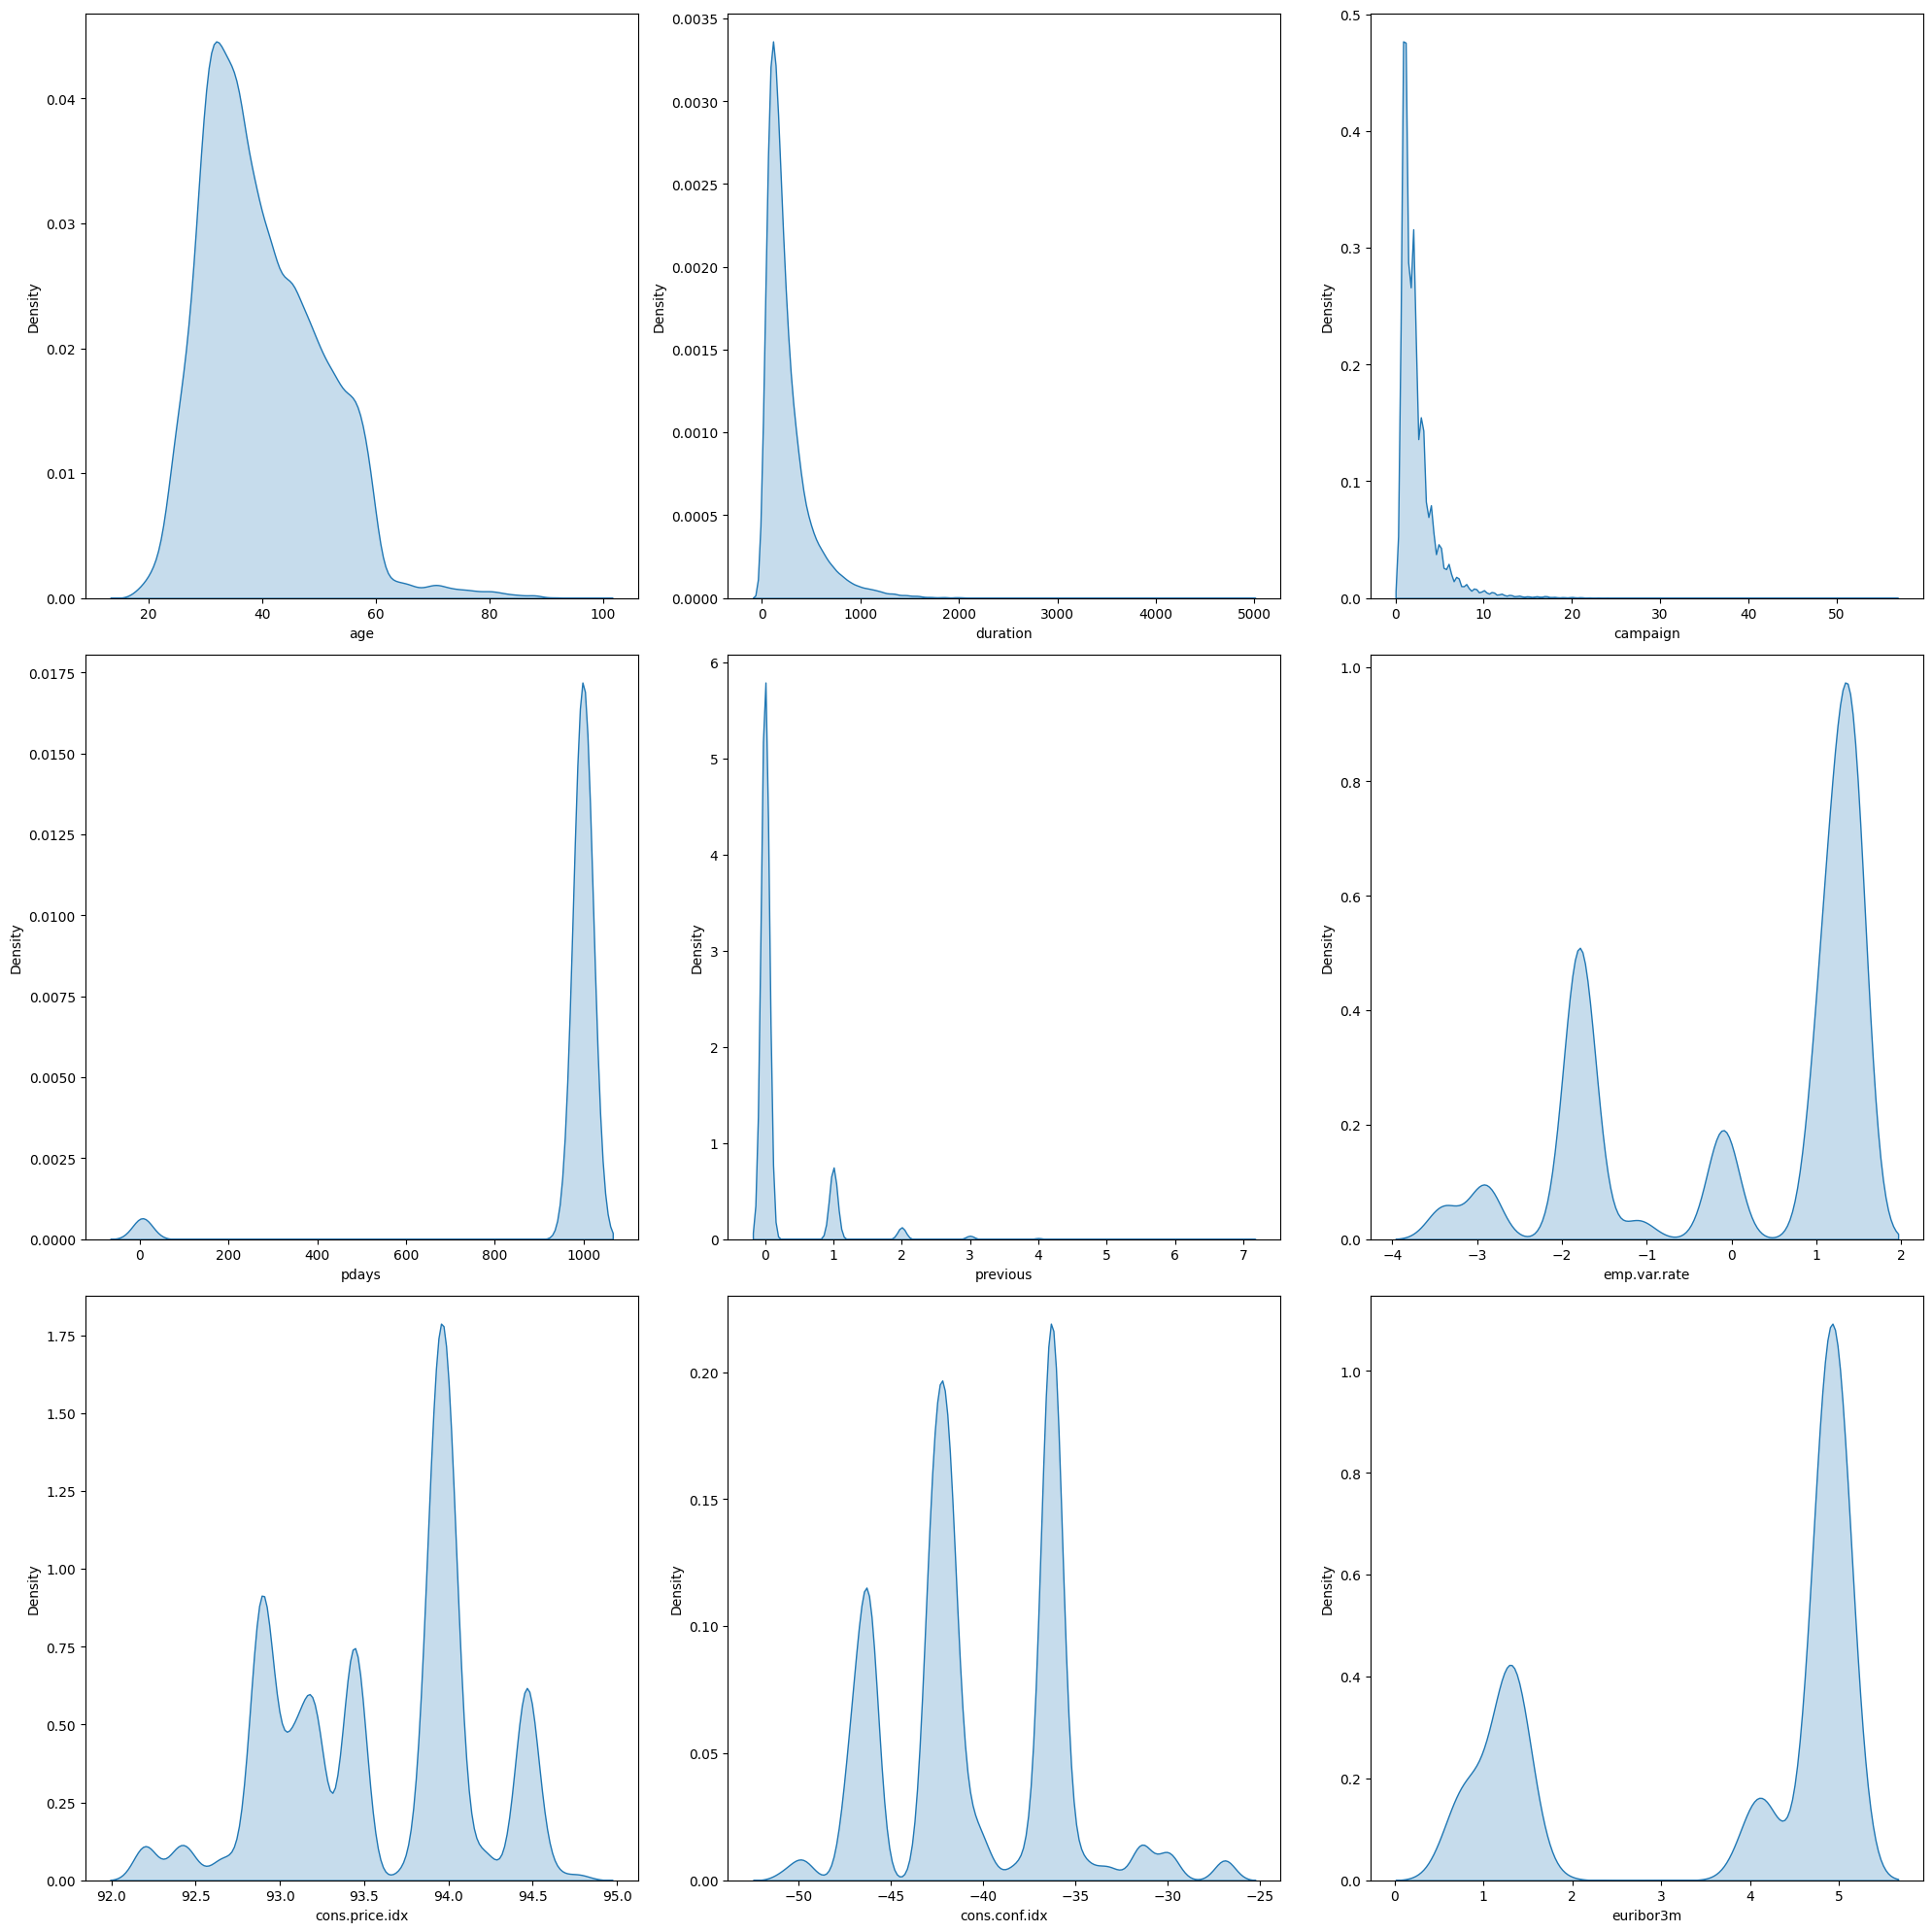

In [19]:
#Density plot
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(20, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over columns and plot density plots
for i, c in enumerate(df_num.columns[:-1]):
    if i < len(axes):  # Check if there are more columns than subplots
        sns.kdeplot(df_num[c], ax=axes[i], fill=True)  # Use sns.kdeplot() for density plots

# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Set layout for subplots
plt.tight_layout()

# Show the plots
plt.show()


duration, campaign and age features are left skewed

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

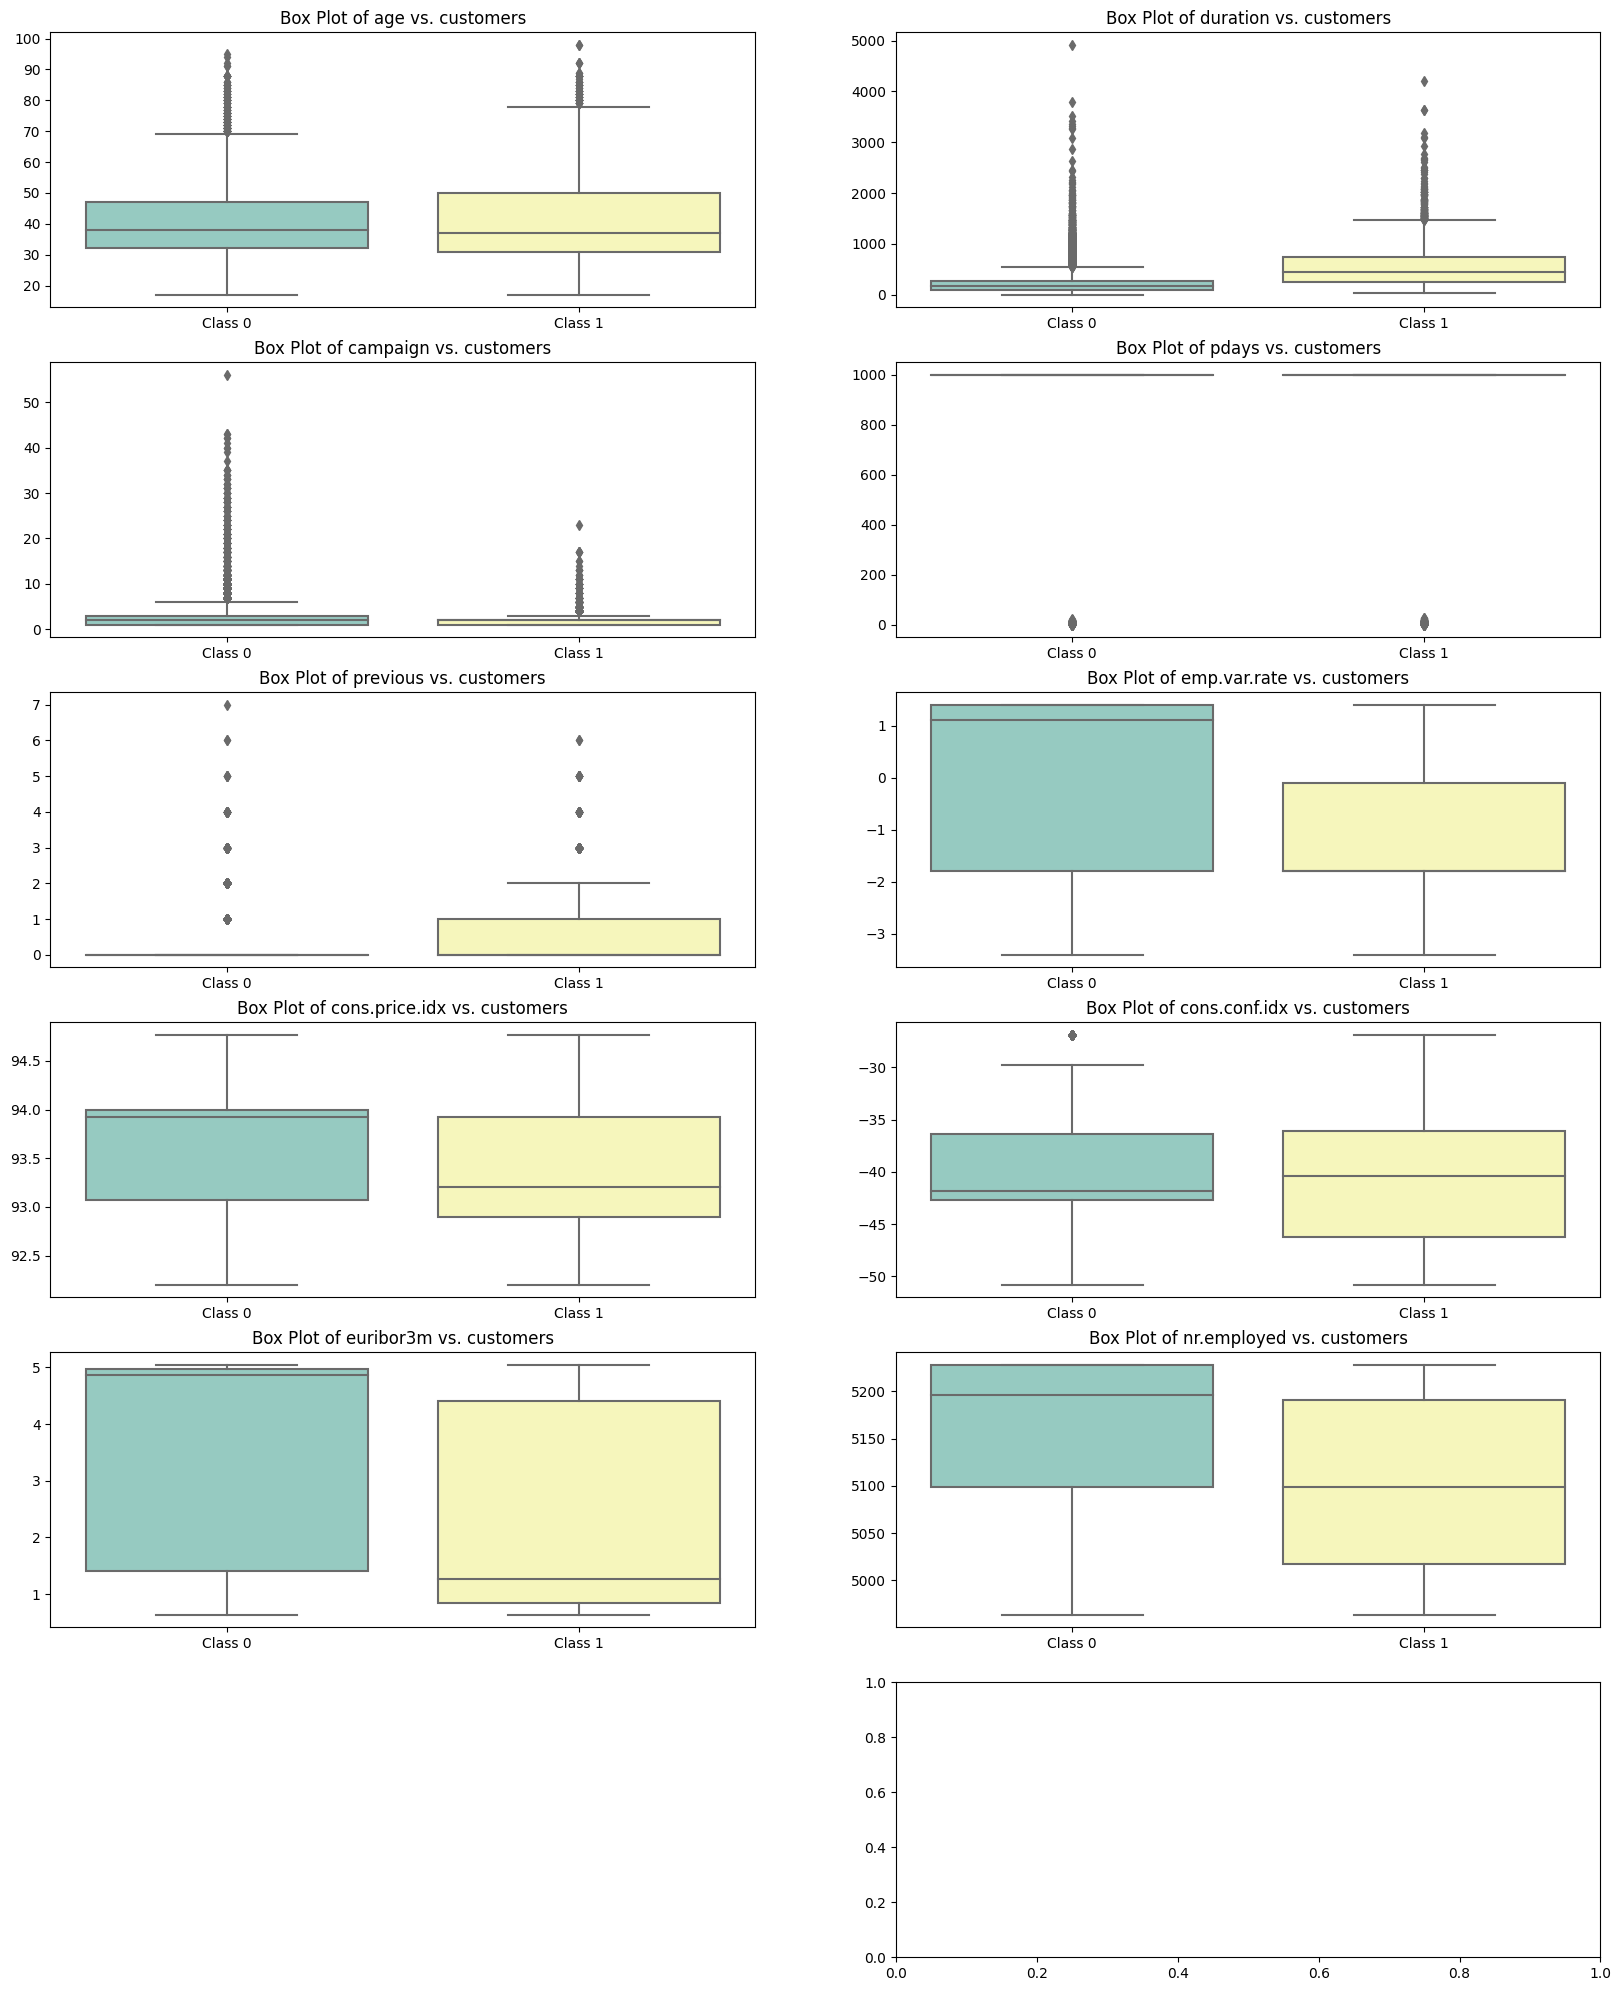

In [20]:
#box plot for each class
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame subset for each class (0 and 1) in the 'y' column
df_class_0 = df[df['y'] == 0]
df_class_1 = df[df['y'] == 1]

# List of numeric columns in the DataFrame
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the number of rows and columns for the subplot grid
num_rows = len(numeric_columns) // 2 + len(numeric_columns) % 2
num_cols = 2

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 25))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create box plots for each numeric column
for index, column in enumerate(numeric_columns):
    ax = axes[index]

    # Combine the two subsets for the box plot
    combined_data = pd.concat([df_class_0[column], df_class_1[column]], axis=1)
    combined_data.columns = ['Class 0', 'Class 1']

    sns.boxplot(data=combined_data, ax=ax, palette="Set3")
    ax.set_title(f"Box Plot of {column} vs. customers")

    # Remove any remaining empty subplots
    if index >= len(numeric_columns) - 1:
        fig.delaxes(ax)

# Adjust layout
plt


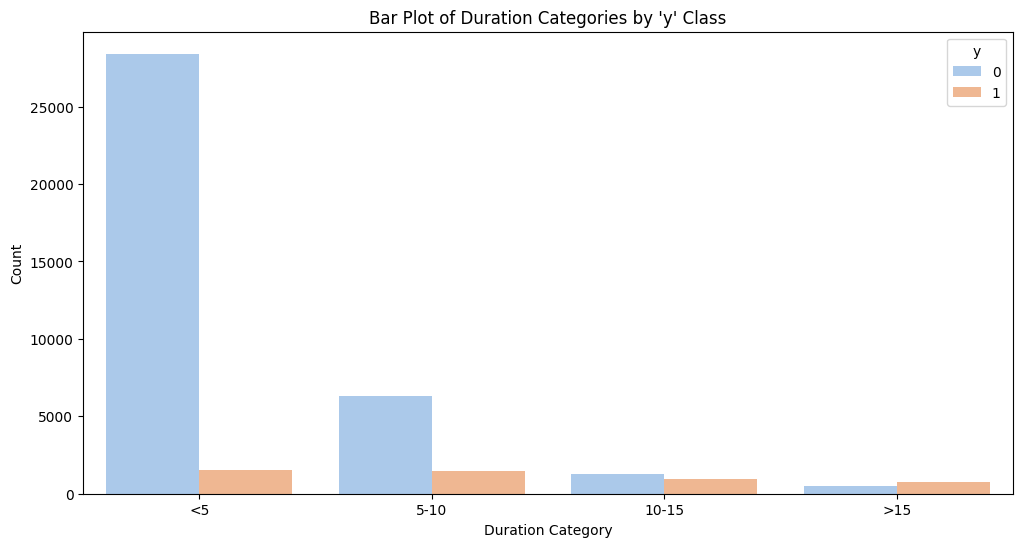

In [21]:
#bar plot of duration
import seaborn as sns
import matplotlib.pyplot as plt


# Convert duration to minutes and create bins
df['duration_minutes'] = df['duration'] / 60
bins = [0,5,10, 15, float('inf')]
labels = ['<5', '5-10', '10-15','>15']
df['duration_category'] = pd.cut(df['duration_minutes'], bins=bins, labels=labels, right=False)

# Create a bar plot of duration categories based on "y" column
plt.figure(figsize=(12, 6))
sns.barplot(x='duration_category', y='count', hue='y', data=df.groupby(['duration_category', 'y']).size().reset_index(name='count'), palette="pastel")

plt.title("Bar Plot of Duration Categories by 'y' Class")
plt.xlabel("Duration Category")
plt.ylabel("Count")
plt.show()


There is a huge gap between subscriber and un-subscriber who spent less than 5 minutes in their previous contact duration

In [22]:
# Create a new DataFrame with selected columns
new_df = df[["y", "pdays"]].copy()

# Create a new column "pdays_group" based on the conditions
conditions = [
    new_df["pdays"] < 365,
    (new_df["pdays"] >= 365) & (new_df["pdays"] <= 730),
    new_df["pdays"] > 730
]

choices = ["less than 365", "365-730", "more than 730"]

new_df["pdays_group"] = pd.np.select(conditions, choices, default="Unknown")

# Display the new DataFrame
print(new_df)

       y  pdays    pdays_group
0      0    999  more than 730
1      0    999  more than 730
2      0    999  more than 730
3      0    999  more than 730
4      0    999  more than 730
...   ..    ...            ...
41175  0      9  less than 365
41176  1    999  more than 730
41177  0    999  more than 730
41178  0    999  more than 730
41179  1    999  more than 730

[41168 rows x 3 columns]


<ipython-input-22-0373c96d4eb9>:13: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  new_df["pdays_group"] = pd.np.select(conditions, choices, default="Unknown")


In [23]:
# Function to categorize pdays
def categorize_pdays(pdays):
    if pdays < 365:
        return "less than a year"
    elif 365 <= pdays <= 730:
        return "between one and two years"
    else:
        return "more than 2 years"

# Apply the categorization function to the "pdays" column
df["pdays_category"] = df["pdays"].apply(categorize_pdays)

# Create a new DataFrame with the desired columns
new_df = df[["y", "pdays_category"]]

print(new_df)

       y     pdays_category
0      0  more than 2 years
1      0  more than 2 years
2      0  more than 2 years
3      0  more than 2 years
4      0  more than 2 years
...   ..                ...
41175  0   less than a year
41176  1  more than 2 years
41177  0  more than 2 years
41178  0  more than 2 years
41179  1  more than 2 years

[41168 rows x 2 columns]


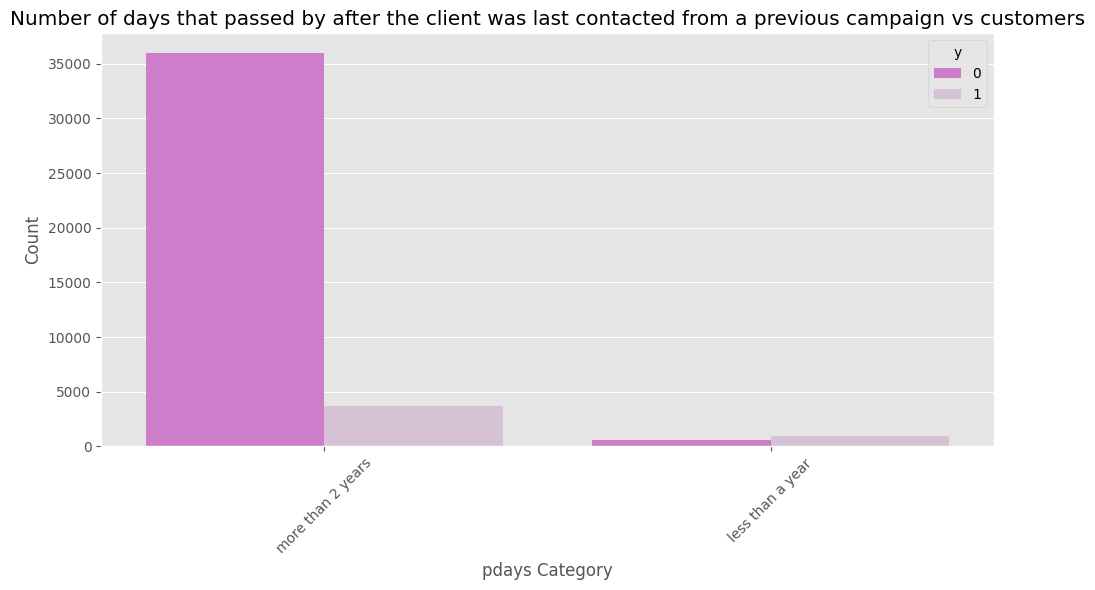

In [24]:
# Set the style
plt.style.use("ggplot")

# Define your custom color palette
custom_palette = ["orchid", "thistle"]

# Create the count plot for "pdays_category" in new_df
plt.figure(figsize=(10, 6))
sns.countplot(x="pdays_category", data=new_df, hue="y", palette=custom_palette)

plt.title("Number of days that passed by after the client was last contacted from a previous campaign vs customers")
plt.xticks(rotation=45)
plt.xlabel("pdays Category")
plt.ylabel("Count")
plt.legend(title="y", loc="upper right")
plt.tight_layout()

plt.show()

it seems that for those who has less Number of days that passed by after the client was last contacted from a previous campaign, respond better to new campaign.

# 7.Explore Categorical Predictor Variables

In [25]:
#indentifying the categorical variables
cat_var= df.select_dtypes(include= ["object"]).columns

In [26]:
#print cat dataframe
print(cat_var)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'pdays_category'],
      dtype='object')


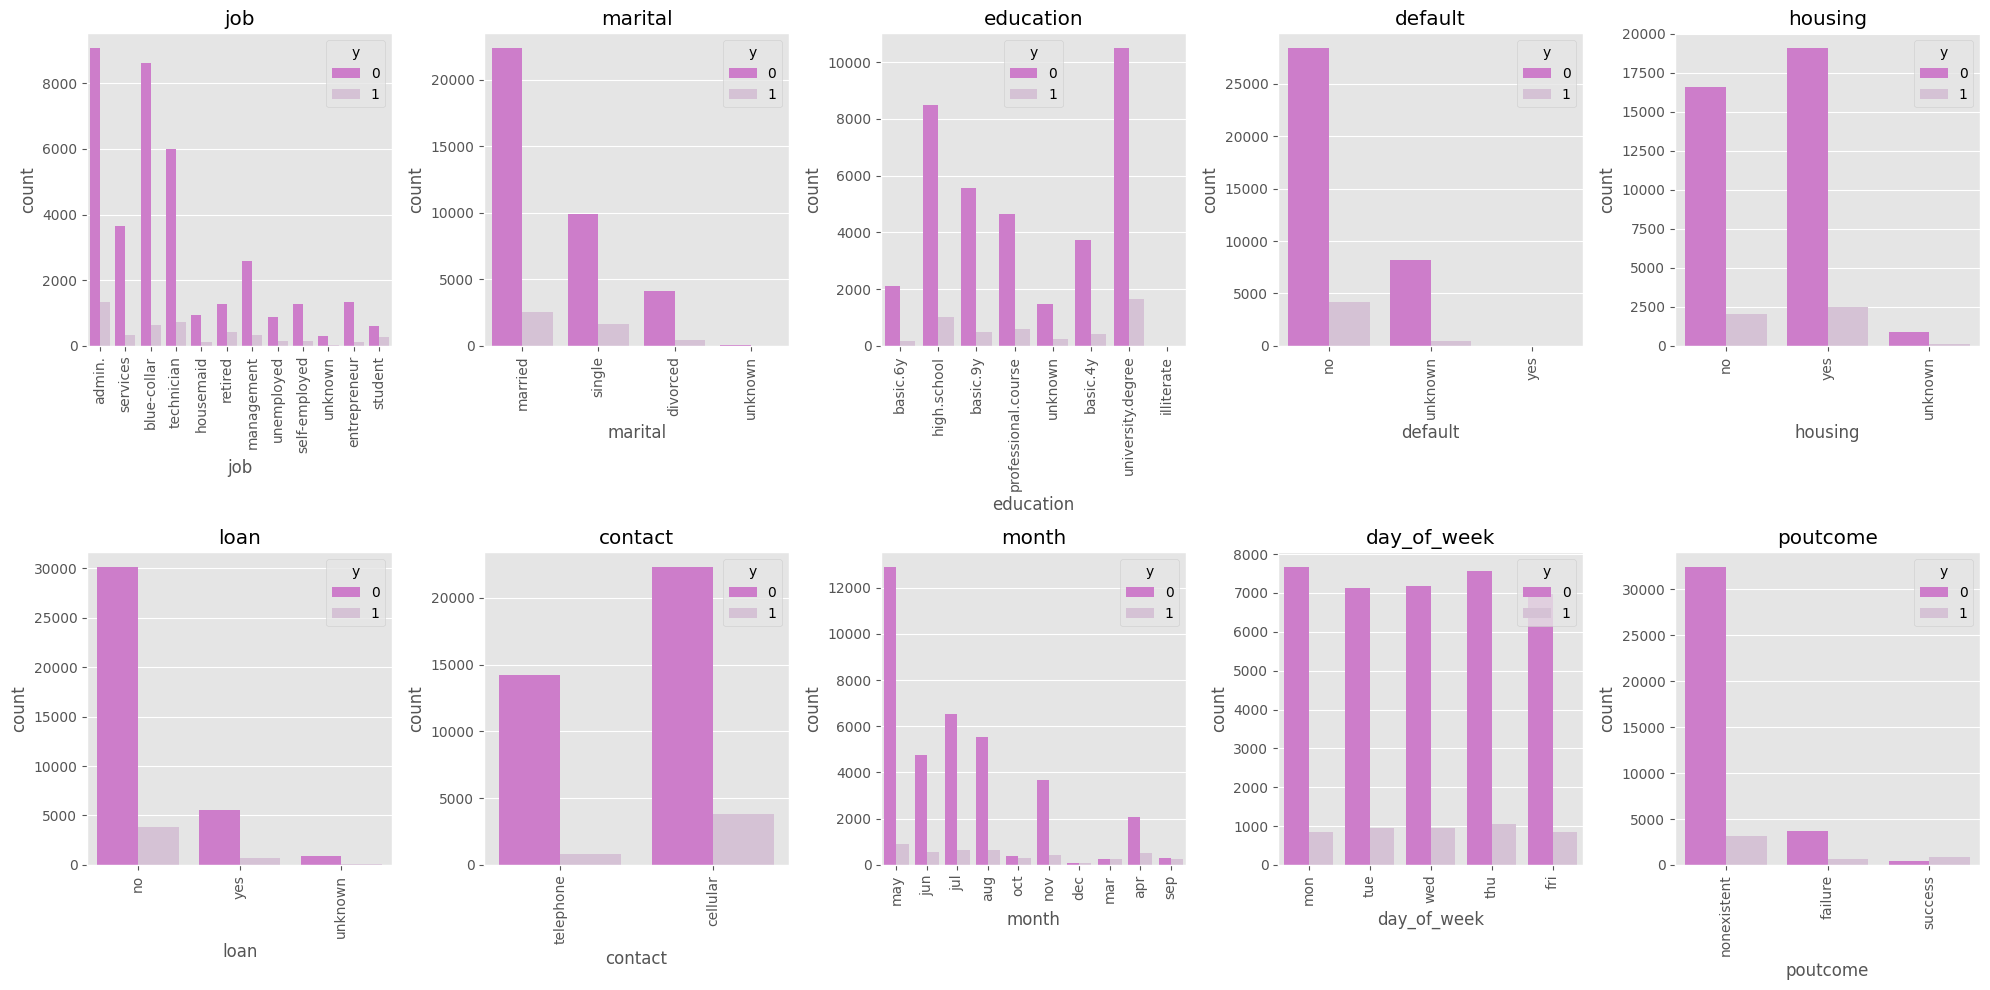

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
plt.style.use("ggplot")

# Define your custom color palette
custom_palette = ["orchid", "thistle"]

# Number of rows and columns for the grid
n_rows = 2
n_cols = 5

# Create a figure and axes for the grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10))  # Increased height to add space

# Adjust spacing between rows
plt.subplots_adjust(hspace=0.5)  # Adjust the value as needed for your spacing

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through categorical variables
for i, column in enumerate(cat_var):
    if i >= n_rows * n_cols:
        break

    ax = axes[i]

    # Use the custom palette for hue colors
    sns.countplot(x=column, data=df, hue='y', palette=custom_palette, ax=ax)

    ax.set_title(column)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Remove any unused subplots
for i in range(len(cat_var), n_rows * n_cols):
    fig.delaxes(axes[i])

# Adjust spacing
plt.tight_layout()

plt.show()


# 8.Explore Relationships

<ipython-input-28-1b716c18e2d5>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


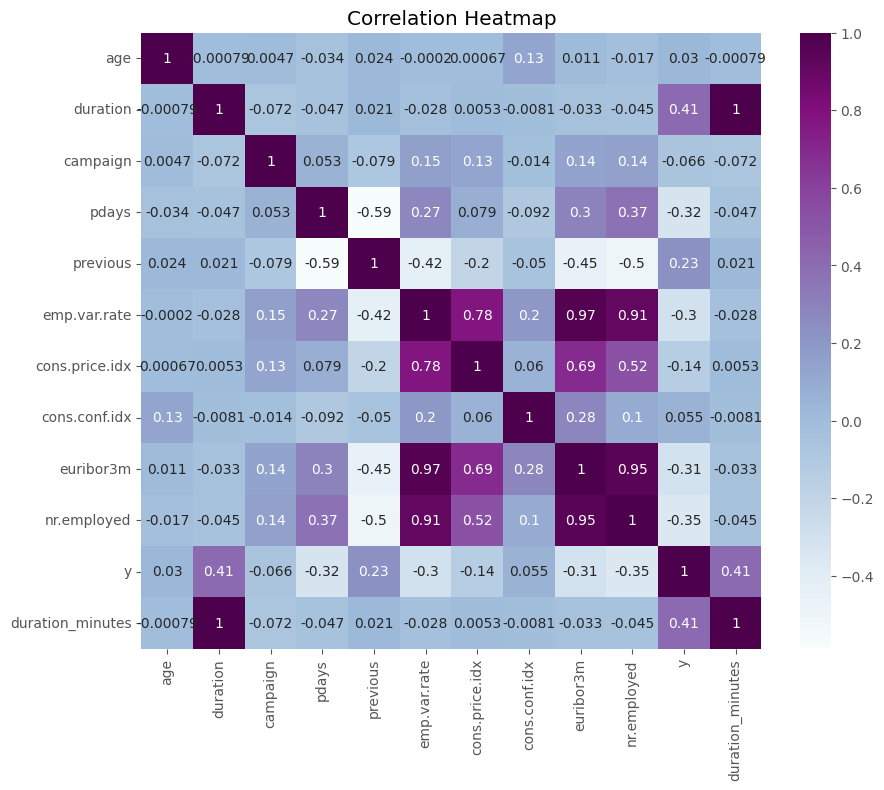

In [28]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the correlation matrix
corr = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="BuPu", annot=True)

plt.title("Correlation Heatmap")
plt.show()



*   employment variation rate is related to euribor 3 month rate - daily indicator

*   number employed - quarterly indicator (numeric) is related to employment variation rate - quarterly indicator (numeric)



*   consumer price index - monthly indicator (numeric) is related to related to employment variation rate - quarterly indicator (numeric)
*   euribor 3 month rate - daily indicator (numeric) is related to employment variation rate - quarterly indicator (numeric)



# 9.Visualisation

In [29]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'duration_minutes',
       'duration_category', 'pdays_category'],
      dtype='object')

In [30]:
#unique values of age
unique_age = df['age'].unique()
print("Unique values of 'age' column:", unique_age)

Unique values of 'age' column: [40 56 45 59 41 24 25 29 57 35 54 46 39 30 55 37 49 34 52 58 32 38 44 42
 60 53 50 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]


According to previous analyses, the minimum age is 17 and the maximum age is 98

In [31]:
# Define age groups
age_groups = [(17, 30), (30, 40), (40, 50), (50, 60), (60, 70), (70, 80), (80, 90), (90, 100)]

# Initialize counters for each age group
group_counts = [0] * len(age_groups)

# Iterate over DataFrame rows and count the frequency of value 1 in the "y" column
for index, row in df.iterrows():
    age = row["age"]
    y_value = row["y"]

    for i, (start, end) in enumerate(age_groups):
        if start <= age < end:
            if y_value == 1:
                group_counts[i] += 1
            break


In [32]:
# Define a custom color palette
custom_palette = sns.color_palette("pastel", n_colors=len(age_groups))


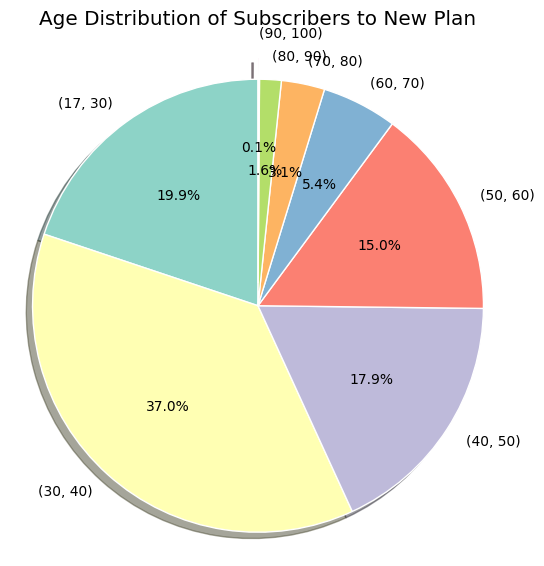

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette
custom_palette = sns.color_palette("Set3", n_colors=len(age_groups))

# Assuming you have defined 'age_groups' and 'group_counts' earlier
labels = age_groups
sizes = group_counts  # Fix: Use the correct variable name

# Calculate the explode values to explode the smallest slice
explode = [0.1 if count == min(sizes) else 0 for count in sizes]  # Fix: Use 'sizes'

# Create the pie plot with explode
fig, ax = plt.subplots()
ax.pie(
    sizes,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90,
    colors=custom_palette,
    explode=explode,
    wedgeprops={"edgecolor": "w", "linewidth": 1},
    shadow=True
)

# Equal aspect ratio ensures that the pie is circular
ax.axis("equal")

# Title
ax.set_title("Age Distribution of Subscribers to New Plan")

# Adjust the distance between title and plot
plt.subplots_adjust(top=1.2)

plt.show()


New subscribers to the plan are generally between the ages of 30 and 40, and customers between the ages of 90 and 100 generate fewer new subscribers.

In [34]:
#unique values of JOB
unique_job = df['job'].unique()
print("Unique values of 'job' column:", unique_job)

Unique values of 'job' column: ['admin.' 'services' 'blue-collar' 'technician' 'housemaid' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


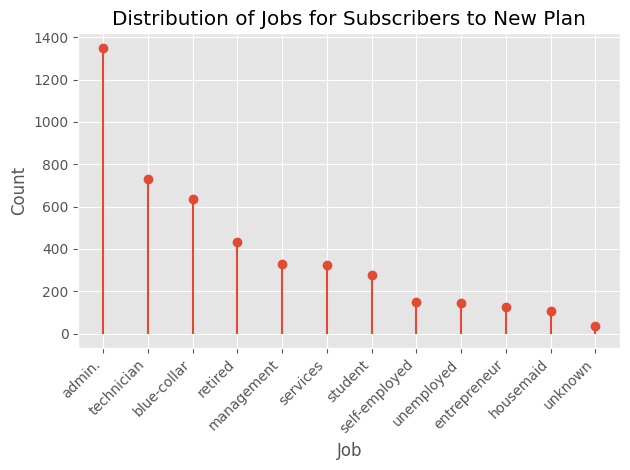

In [35]:
# Filter data
filtered_df = df[df['y'] == 1]

# Count job occurrences
job_counts = filtered_df['job'].value_counts()

# Create a figure and axis
fig, ax = plt.subplots()

# Create a lollipop plot
ax.stem(job_counts.index, job_counts.values, basefmt=" ", linefmt="-", markerfmt="o")

# Set labels and title
ax.set_xlabel("Job")
ax.set_ylabel("Count")
ax.set_title("Distribution of Jobs for Subscribers to New Plan")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.tight_layout()
plt.show()

Customers who subscribe to the plan are generally admins, technicians and blue-collar, and customers who are housemaids who generate fewer new subscribers.

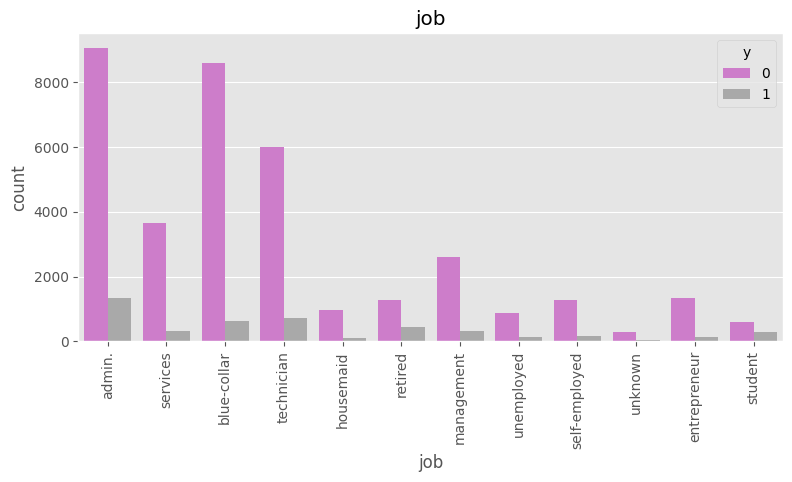

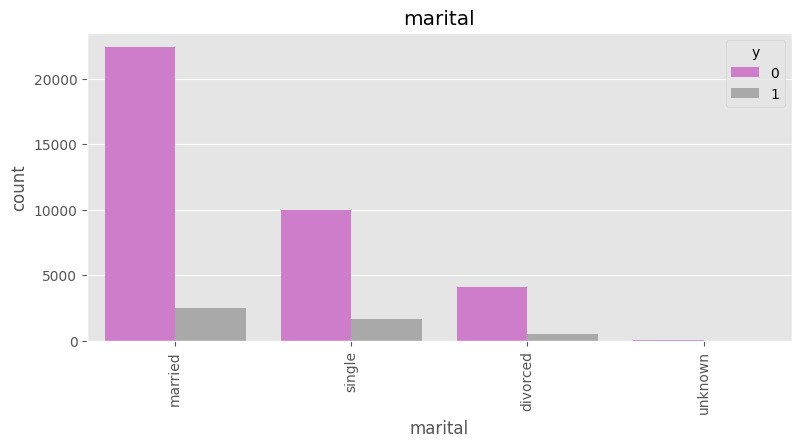

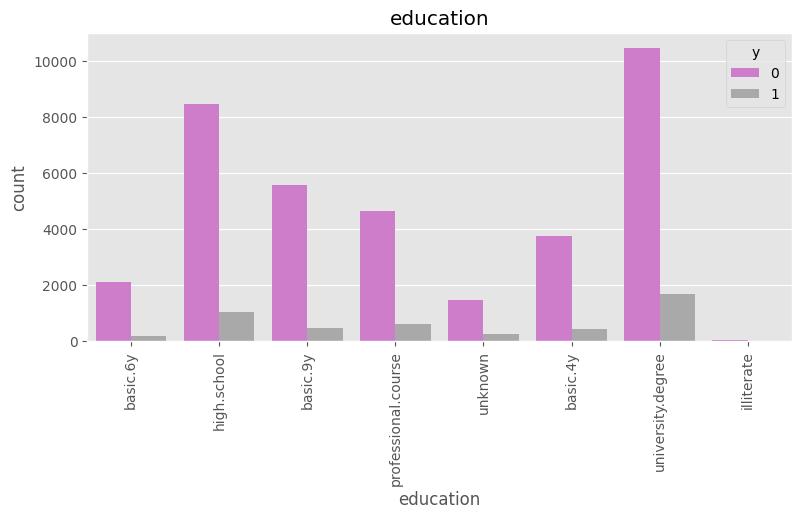

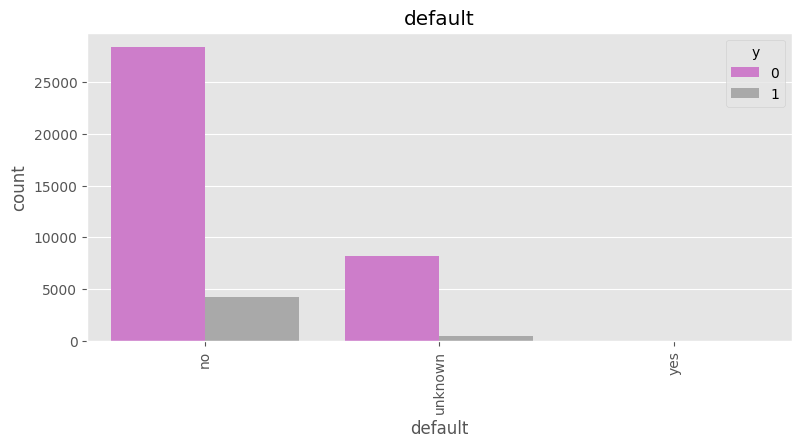

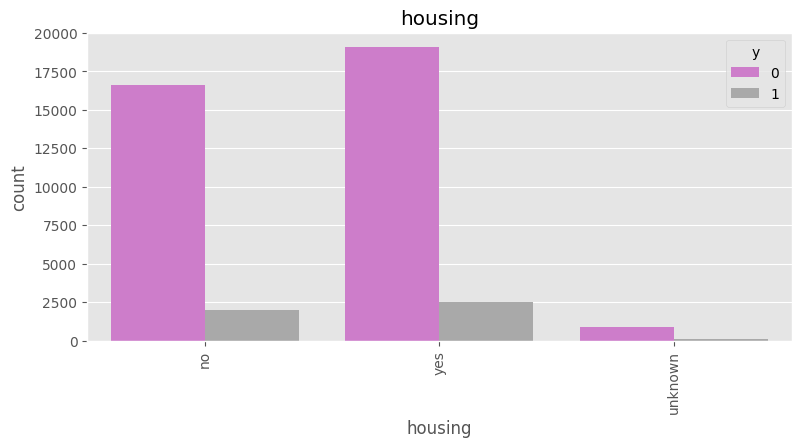

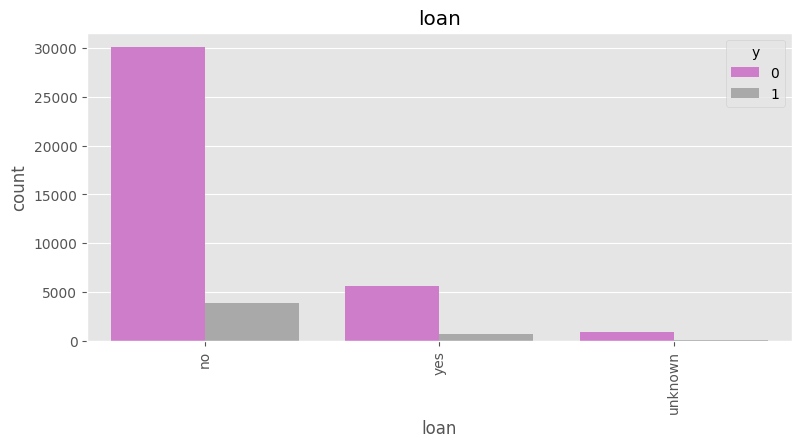

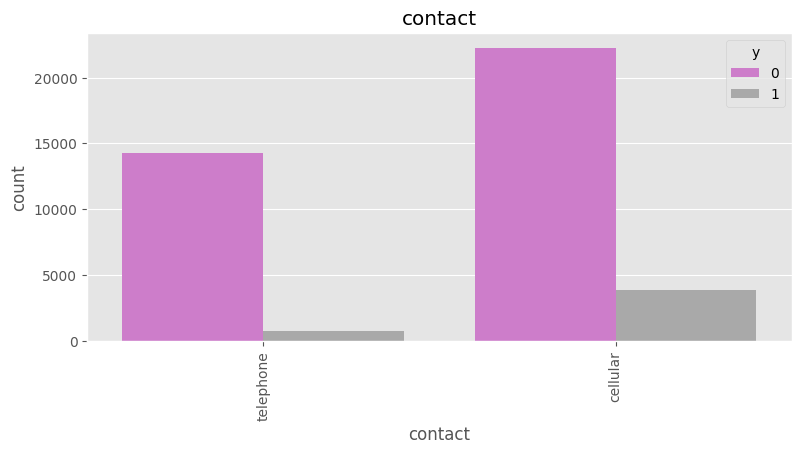

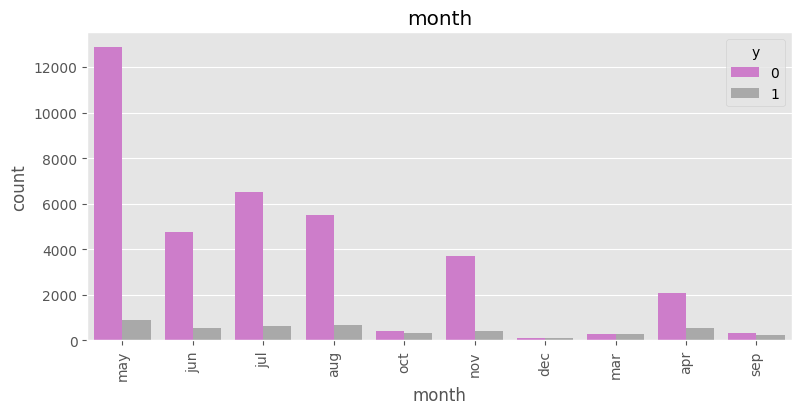

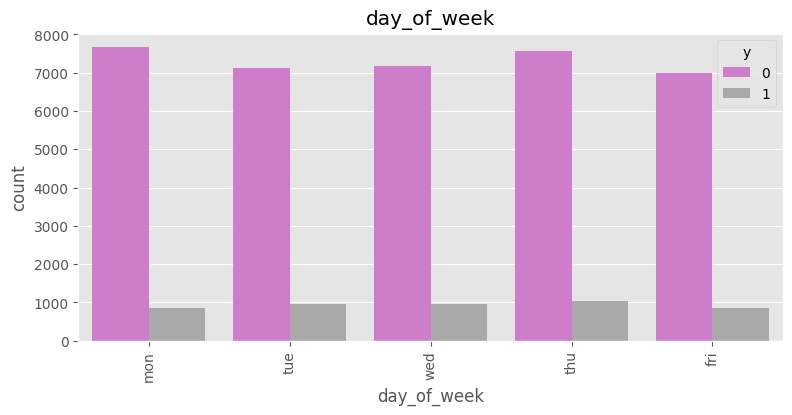

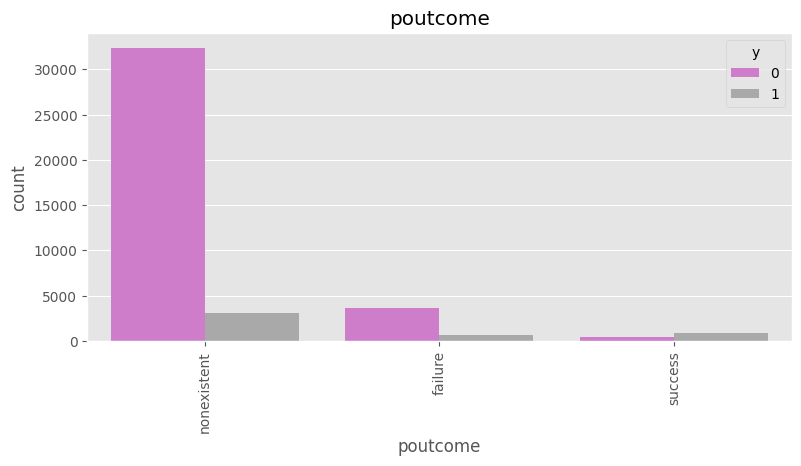

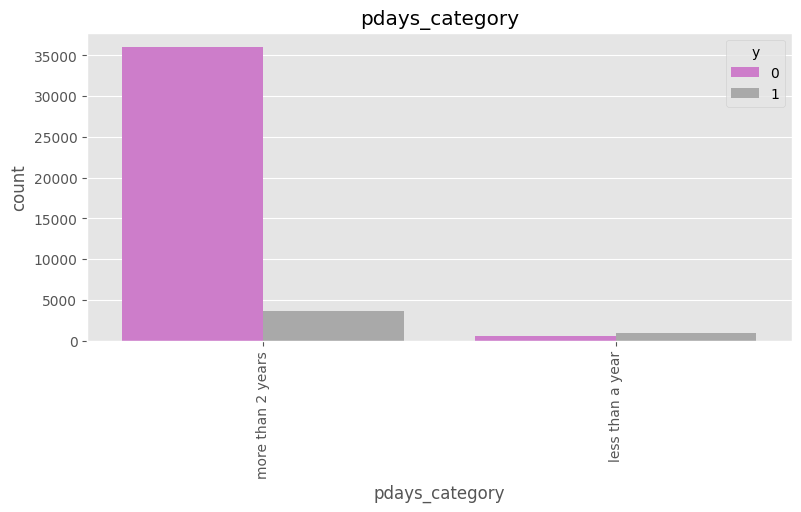

In [36]:

# Define the custom palette
custom_palette = ["orchid", "darkgray"]

# Your existing code
plt.style.use("ggplot")
for column in cat_var:
    plt.figure(figsize=(20, 4))
    plt.subplot(121)
    sns.set_palette(custom_palette)  # Set the custom palette
    sns.countplot(x=column, data=df, hue='y')
    plt.title(column)
    plt.xticks(rotation=90)

plt.show()

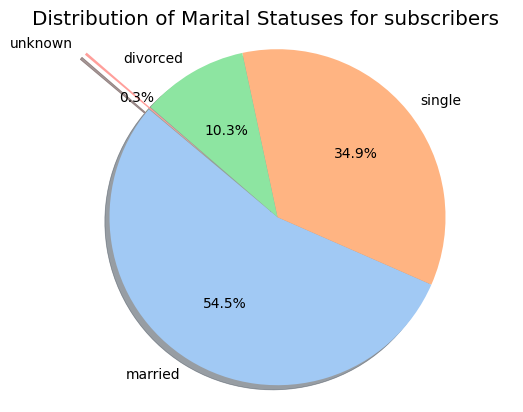

In [37]:
# Filter data for y=1
filtered_df = df[df['y'] == 1]
custom_palette = sns.color_palette("pastel")
# Count marital statuses
marital_counts = filtered_df['marital'].value_counts()

myexplode=[0,0,0,0.5]
# Create a pie chart
plt.pie(marital_counts,explode=myexplode, labels=marital_counts.index, autopct='%1.1f%%', startangle=140,colors=custom_palette, shadow=True)
plt.axis('equal')
plt.title("Distribution of Marital Statuses for subscribers")
plt.show()

Most subscribers to the plan are also married, while a minority are single.